In [ ]:
import urllib.request
import zipfile
import os

try:
    os.mkdir("files")
except:
    pass

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2425a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

# Libraries: Numpy (two weeks)

## Python Programming for Engineers
### Tel-Aviv University / 0509-1820 / Fall 2025-2026

## Today's agenda
 
- Numpy array objects
- Numpy operations
- Image representation in Numpy
- Loading and viewing images
- Image manipulations
    - Thresholding
    - Squeezing
    - Darkening
    - Noising

## What's NumPy?

- NumPy (Numeric Python) is a **library** provides basic functions for manipulating large arrays and matrices of numeric data
    - **library**: an extension of Python that contains additional classes, function etc.
- NumPy is **open-source**, meaning its code is available to see for all<br>
- NumPy is used (almost) **everywhere** python is used

### Import and usage


- The libraries we need (like Numpy) are already included within the installation of Anaconda.
- Make sure you **import** the packages you need at the beginning of your program
- Here is how to import the NumPy package for future usage

In [2]:
import numpy as np

- We gave NumPy an alias (shortage): **np**
- In the program we can use **np** instead of the full name **numpy**

Slide 3

## NumPy Array

NumPy’s main object is a homogeneous
multidimensional array.
- It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers
- In Numpy dimensions are called axes.
- The number of axes is rank (the number of array’s dimensions).
- A vector is an array of rank 1
- A 2D matrix is an array of rank 2

### Creating a new Numpy array

In [3]:
a = np.array([0, 1, 2])
print('a is' , a)
b = np.array([[3, 4, 5], [6, 7, 8]])
print('b is \n' , b)

a is [0 1 2]
b is 
 [[3 4 5]
 [6 7 8]]


### Creating an arrays of zeros or ones

In [ ]:
print(np.zeros(7, dtype=int))

In [ ]:
print(np.ones((2,3), dtype=float))

In [ ]:
print(50*np.ones((2,3), dtype=float))

### Creating arrays containing number sequences

Start, End (exclusive), Step

In [ ]:
print(Basic , 2))

Unlike default python ranges, this can also work with floating point arguments

In [ ]:
print(np.arange(1.5, 2.5, 0.1))

### Arrays of random values

Creating an array of random values between [0, 1)

In [ ]:
print(np.random.random((2,5)))

"Strech" the values' interval by 2 (values are between 0 to 2)

In [ ]:
print(np.random.random(5)*2)

"Shift" the values' interval by 4 (values are between 4 to 6)

In [ ]:
print(4+np.random.random(5)*2)

Creating an array of random **integer** values

In [ ]:
print(np.random.randint(0,7,(5,2)))

## Image representation in Numpy
    
How every image is stored in memory


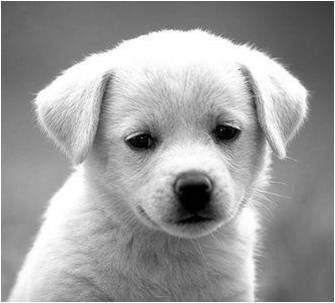

### Matrix and pixels representation
    
- Images are represented as a N-by-M matrix, where each element in the matrix is a **pixel**
-  A **pixel** represents the light intensity / color at
that location
- In colored images, each pixel has three color values: <span style='color:red'>Red</span> , <span style='color:green'>Green</span> and <span style='color:blue'>Blue</span> intensities
- For <span style='color:gray; text-shadow: -1px 1px 0 #222, 1px 1px 0 #222,1px -1px 0 #222,-1px -1px 0 #222;'>grayscale</span> images, each pixel has only one element: <span style='color:white; text-shadow: -1px 1px 0 #000, 1px 1px 0 #000,1px -1px 0 #000,-1px -1px 0 #000;'> White </span> intensity

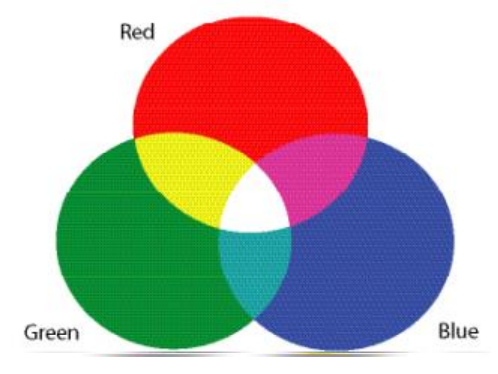

https://www.w3schools.com/Colors/colors_rgb.asp

### Resolution

An image **resolution** is the number of pixels in the image
- The resolution of an image impact its quality: higher resolution (i.e., higher number of pixels) $\rightarrow$ better quality
- Common examples:
    - Full HD: 1080p image resolution (1,920 x 1,080 pixels – ~2 million pixels)
    - 4K image resolution (3,840 x 2,160 pixels – ~8 million pixels)

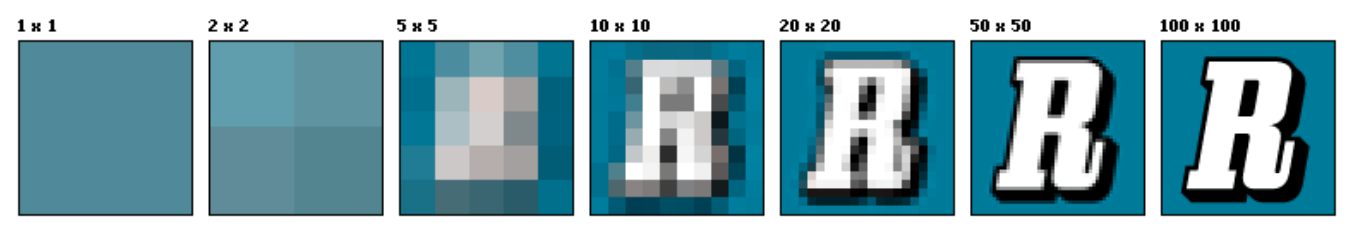

### Grayscale Images

In our course, we deal only with **grayscale** images (although
can be applicable for color images)
- 8 bits per pixel (256 gray levels)
- 0 – black, 255 – white

<table><tr><td>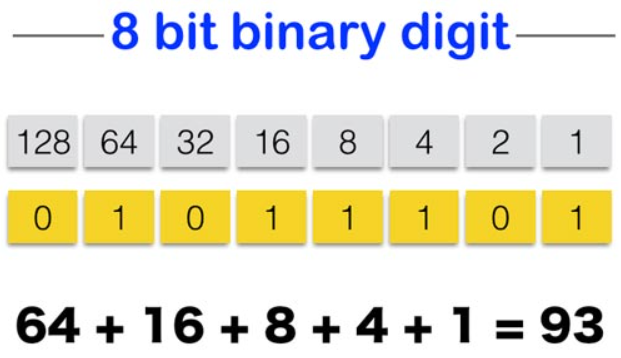</td><td>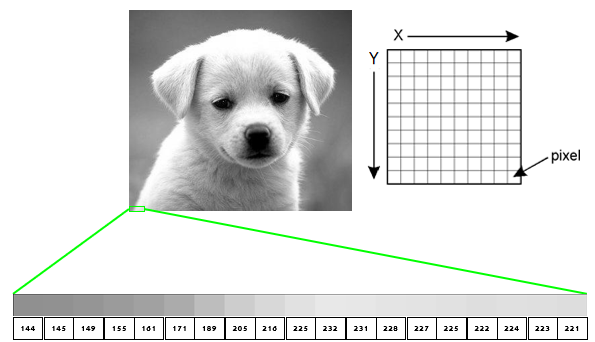</td></tr></table>

### How images are stored and manipulated in Python?

- We need a **class** that served as an image data structure
- And also, **functions** that help us to manipulate images

### Loading an image
- We use the `imread` function of the `imageio` library to load an image
- #### The examples in this notebook requires the file `files/dog.png`
    - Make sure you have this file by executing the code at the first block of this notebook

In [ ]:
import imageio

In [ ]:
im_dog = imageio.v3.imread('files/dog.png')
print(im_dog)

In [ ]:
print(type(im_dog), im_dog.dtype)

### Viewing an image

- We use the `imshow` function of the matplotlib library to show an image
    - Writing code with matplotlib is out of scope
    - Use it only where we write it for you
    - e.g., blocks with `plt` in this notebooks, tests in exercise skeleton etc.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(im_dog,cmap='gray')

### Creating a new image

In [ ]:
zeros=np.zeros((100,100))

In [ ]:
ones = np.ones((100,100)) * 255

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(zeros,vmin=0, vmax=255,cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(ones,vmin=0, vmax=255,cmap=plt.cm.gray)
plt.show()

Slide 5

### Array attributes and methods

In [ ]:
b = np.array([[3, 4, 5], [6, 7, 8]])
print('b is \n' , b)

In [ ]:
print(b.shape)

In [ ]:
print('b is \n',b)
print('b transposed is \n',b.T)

In [ ]:
print(len(b))
print(len(b.T))

In [ ]:
c = b.reshape((3,2))
print(c)

### Image array : attributes and methods

In [ ]:
print(im_dog.shape)
print(len(im_dog))

In [ ]:
im_transposed = im_dog.T
print(im_transposed.shape)

In [ ]:
plt.imshow(im_transposed,cmap='gray')

Slide 6

### linspace

Start, End, Number of points

In [ ]:
print(np.linspace(1, 5, 9))

### Two dimensional linspace

In [ ]:
nx = 4
ny = 3
x = np.linspace(0, 1, nx)
print(x)
y = np.linspace(0, 1, ny)
print(y)

In [ ]:
xv, yv = np.meshgrid(x,y)

xv, yv

In [ ]:
print(xv,'\n\n',yv)

In [ ]:
plt.figure(figsize=(2,2))
plt.plot(yv, xv, marker='o', color='k', linestyle='none')
plt.show()

### Making a more interesting image

In [ ]:
jump_4 = np.arange(0, 32, 4)
jump_32 = np.arange(0, 256, 32)

print(jump_4, jump_32, sep='\n')

In [ ]:
mesh_4, mesh_32 = np.meshgrid(jump_4, jump_32)
# print(mesh_4, mesh_32, sep='\n')

In [ ]:
mesh_res = mesh_4 + mesh_32
print(mesh_res)

In [ ]:
plt.imshow(mesh_res,cmap='gray')

### Indexing

In [ ]:
print(np.arange(3))

In [ ]:
a = np.diag(np.arange(3))
print(a)

In [ ]:
print(a[1, 1])

In [ ]:
print(a[:,1])

In [ ]:
a[2, 1] = 10
print(a[:,1])

In [ ]:
a = np.arange(0, 100, 10)
print(a)
print(a[[3,2,3]])

### Exercise: slicing 2-dimensional array (matrix)
- Create the following matrix
- Perform the slicing operations depicted below

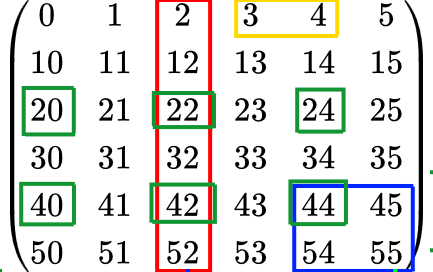

First, define the matrix

In [ ]:
a= np.array([[0, 1, 2,3,4,5],
            [10, 11, 12,13,14,15],
            [20, 21, 22,23,24,25],
            [30, 31, 32,33,34,35],
            [40, 41, 42,43,44,45],
            [50, 51, 52,53,54,55]])
print(a)

By the way, how can we get that matrix writing less numbers?

#### <span style='color:orange'> Row slicing </span>

In [ ]:
print(a[0,3:5])

#### <span style='color:red'> Column slicing </span>

In [ ]:
print(a[:,2])

#### <span style='color:blue'> Sub square slicing </span>

In [ ]:
print(a[4:,4:])

#### <span style='color:green'> Step slicing </span>

In [ ]:
print(a[2::2,::2])

Slide 8

### Slicing on an image

In [ ]:
new_fig = np.zeros((100,100))
new_fig[::2,::2] = 255

In [ ]:
plt.imshow(new_fig, cmap=plt.cm.gray)

In [ ]:
im2=im_dog[::10,::10]

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(im2, cmap=plt.cm.gray)

Slide 9

### Comparisons and Boolean operations

In [ ]:
a = np.random.randint(0, 5, 5)
print(a)

In [ ]:
b = np.arange(5)
print(b)

In [ ]:
comp1 = a==b

In [ ]:
print(comp1)
print(comp1.any())
print(comp1.all())

In [ ]:
print(comp1.nonzero())
print(comp1.sum())

We can also perform arithmetic operations between arrays with the right shape:

In [ ]:
s = np.ones((3,3)) + (5 * np.ones((3,3)))
print(s)

In [ ]:
r = np.ones((3,3)) + np.array([2,4,1])
print(r)

This won't work:

In [ ]:
                                    b = np.ones((3,3)) + np.array([2,3])

### Masking

In [ ]:
a = np.random.randint(0,21, 15)
print(a)

In [ ]:
mask = (a%3 == 0)
print(mask)

In [ ]:
print(a[mask])

In [ ]:
a[mask] = -1
print(a)

### Image masking: thresholding

In [ ]:
def segment_image(im_mat, th):
    new_mat = np.zeros(im_mat.shape)
    new_mat[im_mat >= th] = 255
    return new_mat

In [ ]:
im_dog = imageio.v3.imread('files/dog.png')
new_image= segment_image(im_dog, 125)
print(new_image)

In [ ]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.show()

Slide 11

### Operations along an axis

Summation

In [ ]:
a = np.array([[4, 2 , 5], [1, 3, 1]])
print(a)

In [ ]:
print(a.sum())
print(a.sum(axis=0))
print(a.sum(axis=1))

Sorting

In [ ]:
print(a)
b = np.sort(a, axis=1)
print(b)

In [ ]:
a.sort(axis=0)
print(a)

### Operation along an axis: squeeze an image

- Input: An image m and a factor k (integer)
- Output: New image where the column in the new image = the mean of k columns

In [ ]:
def squeeze_image(im,factor):
    new_n = im.shape[0]
    new_m = im.shape[1] // factor
    new_mat = np.zeros((new_n,new_m))
    for j in range(new_mat.shape[1]):
        curr_range = range(j*factor,min((j+1)*factor,im.shape[1]))
        new_mat[:,j] = im[:,curr_range].mean(axis=1)
    return new_mat

In [ ]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = squeeze_image(im_dog,4)

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

Slide 12

### Darken image

Make the image darker in `dark_strength` intensity

In [ ]:
def darken_image(im,dark_strength=150):
    dark_im = im.copy()
    for row in range(dark_im.shape[0]):
        for col in range(dark_im.shape[1]):
            dark_im[row,col] = im[row,col]-dark_strength
    return dark_im

In [ ]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = darken_image(im_dog,100)

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

### Why did we get bright pixels?

numerical overflow! Recall that every pixel range is between 0-255, getting a too high/too low result from an arithmetic operation will wound the result like a modulo:

In [ ]:
np.uint8(246) + np.uint8(20)

In [ ]:
np.uint8(10) - np.uint8(20)

To solve this, we will convert the types to something with a bit more range just before doing the operation:

In [ ]:
a = np.uint8(10)
b = np.uint8(20)
c = np.int_(a) - np.int_(b)
print(c, type(c))

### Darken image revised

In [ ]:
def darken_image(im,dark_strength=200):
    dark_im = im.copy()
    for row in range(dark_im.shape[0]):
        for col in range(dark_im.shape[1]):
            dark_im[row,col] = max(im[row,col]-dark_strength,0) # Note the max operator here!
    return dark_im



In [ ]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = darken_image(im_dog,100)

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

### Image noising

Lets say we want to add random noise an image, maybe in order to confuse a face detection algorithm.

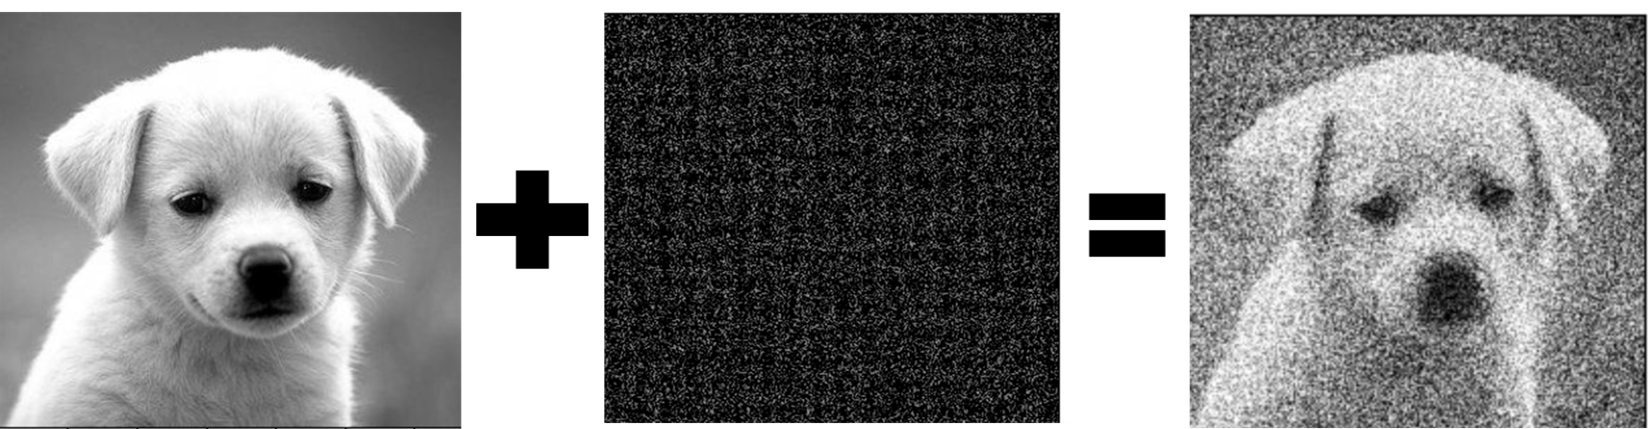

In [ ]:
def noise_im(im,noise_strength=50):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape, dtype=np.uint8)
    noisy_image = im + noise # np.clip(im + noise, 0, 255)
    return noisy_image

In [ ]:
im = np.ones((100,100), dtype=np.uint8)*200 # plt.imread('files/dog.png')
new_image = noise_im(im,100)

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()

#### Again, numerical overflow!

Slide 14

### Image noising without numerical overflow

In [ ]:
def noise_im_no_overflow(im,noise_strength=50):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape, dtype=np.uint8)
    noisy_image = np.clip(np.int_(im) + np.int_(noise), 0, 255)
    return noisy_image

Alternative implementation

In [ ]:
def noise_im_no_overflow(im,noise_strength=50):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape) # Note that we dropped the dtype=np.uint8 here
    noisy_image = np.clip(im + noise  , 0, 255) # summing np.uint8 and np.uint32 resulting in np.uint32
    return noisy_image

In [ ]:
im_dog = imageio.v3.imread('files/dog.png')
noisy_image_no_overflow = noise_im_no_overflow(im_dog,150)
noisy_image = noise_im(im_dog,150)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(im_dog, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 3, 2)
plt.imshow(noisy_image,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(noisy_image_no_overflow,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()

Note that the noising only introduce "brightening noise"
- How can we intoduce "darkening noise"?

Slide 15

### Image noising: introduce darkening noise

In [ ]:
def noise_im_no_overflow_with_darkening_noise(im,noise_strength=50):
    noise_im = im.copy()
    # Note that we CANNOT use dtype=np.uint8 since negative numbers are allowed
    noise = np.random.randint(-noise_strength//2, noise_strength//2 + 1, size=im.shape)
    noisy_image = np.clip(im + noise, 0, 255)

    return noisy_image

In [ ]:
im_dog = imageio.v3.imread('files/dog.png')
noisy_image_no_overflow_with_darkening_noise = noise_im_no_overflow_with_darkening_noise (im_dog,300)

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(im_dog, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 3, 2)
plt.imshow(noisy_image_no_overflow,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(noisy_image_no_overflow_with_darkening_noise,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()

### Back to our noising scheme

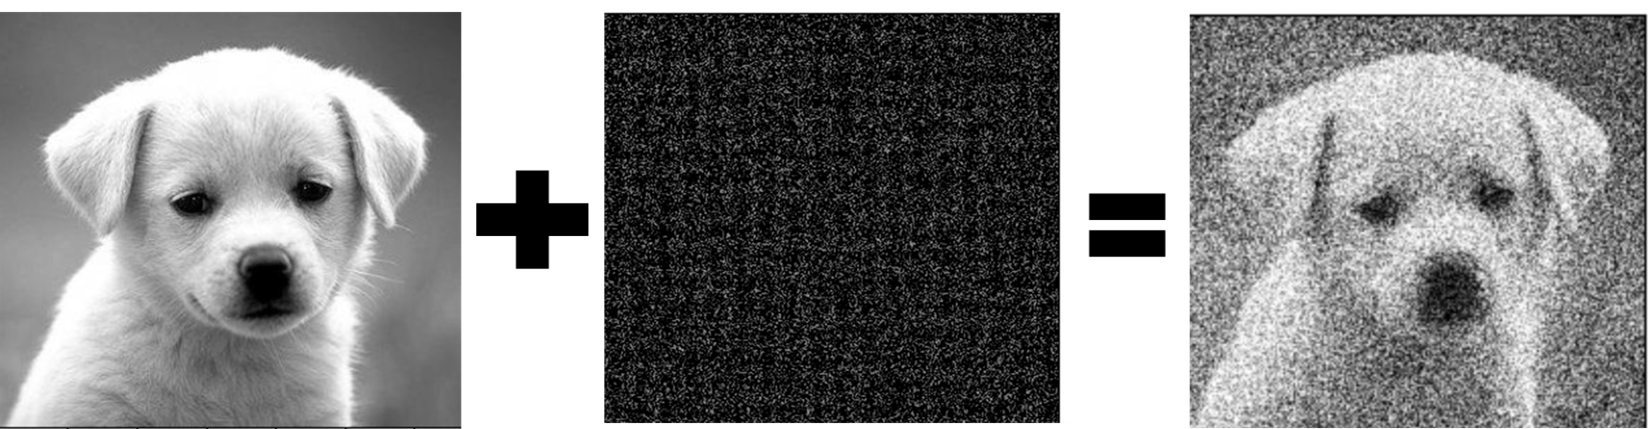

In [ ]:
def noise_im_no_overflow_with_darkening_noise(im,noise_strength=50):
    noise_im = im.copy()
    # Note that we CANNOT use dtype=np.uint8 since negative numbers are allowed
    noise = np.random.randint(-noise_strength//2, noise_strength//2 + 1, size=im.shape)
    noisy_image = np.clip(im + noise, 0, 255)

    ### matplotlib code: out of scope
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.subplot(1, 3, 2)
    plt.imshow(noise,vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.subplot(1, 3, 3)
    plt.imshow(noisy_image,vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.show()
    ####

    return noisy_image

In [ ]:
im_dog = imageio.v3.imread('files/dog.png')
noisy_image_no_overflow_with_darkening_noise = noise_im_no_overflow_with_darkening_noise (im_dog,300)

## Question from previous exams

[Exam 2023-2024 semester A Moed A](https://courses.cs.tau.ac.il/pyProg/2425a/exams/exam2324a_moedA.pdf)

3.A

In [ ]:
def get_nth_mask(im, n, idx):
    size = (im.max() - im.min()) / n
    mask_high = im >= (im.min() + size * idx)
    mask_low = im <= (im.min() + size * (idx + 1))
    return mask_high * mask_low

In [ ]:
im = np.array([[3,5,9],[8,1,2],[7,6,4]])
print(get_nth_mask(im, 3, 0))

3.B

In [ ]:
def get_n_valued_image(im, n):
    out = np.zeros(im.shape)
    for i in range(n):
        mask = get_nth_mask(im, n, i)
        out[mask] = im[mask].mean()
    return out

In [ ]:
im = np.array([[3,5,9],[8,1,2],[7,6,4]])
print(get_n_valued_image(im, 3))

3.C

In [ ]:
def compute_entropy(im):
    image_pixels = im.flatten()
    bin_prob = np.bincount(image_pixels) / (image_pixels.shape[0])
    bin_prob = bin_prob[bin_prob != 0]
    return (-bin_prob * np.log2(bin_prob)).sum()

In [ ]:
im = np.array([[1,4],[4,8]])
compute_entropy(im)

what is entropy https://en.wikipedia.org/wiki/Entropy_(information_theory):
- you are **not required** to understand the math behind such formulas
- you are **required** to be able to implement a given formula such as entropy

3.D

In [ ]:
im = np.arange(6).reshape((2, 3))
print((im[:, ::2] ** 2).sum())

### Common numpy functions

| categoy  | name  | use |
|:--------:|:-----|:---|
|**Creation**| | |
| | [np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) | Create a new ndarray based on an object like a list |
| | [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) | Create a new ndarray of 0 elements (can choose dtpe) |
| | [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) | Create a new ndarray of 1 elements (can choose dtype) |
| | [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) | create a new ndarray with evenly spaced elements on an interval using a set jump distance |
| | [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) | create a new ndarray with evenly spaced elements on an interval using a set number of elements |
| | [np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) | given two arrays: *a* and *b*, create two matrices one with *a* repeated as rows *len(b)* times, and one with *b* repeated as columns *len(a)* times |
| | [np.random.random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html) | create a new ndarray with random numbers between 0 and 1 |
| | [np.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) | create a new ndarray with random integers in a provided range |

### Common numpy functions (cond.)

| categoy  | name  | use |
|:--------:|:-----|:---|
|**Typing**| | |
| | [np.uint8](https://numpy.org/devdocs/reference/arrays.scalars.html#numpy.uint8) | unsigned (non-negative) integer between 0 and 256 |
| | [np.int_](https://numpy.org/devdocs/reference/arrays.scalars.html#numpy.int_) | default integer type, can be negative and big enough for all our needs |
|**Attribute access**| | |
| | [array.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) | get a tuple with the shape of *array* (n_rows, n_cols, ... ) |
| | [array.T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html) | create a new ndarray that is *array* transposed |

### Common numpy functions (cond.)

| categoy  | name  | use |
|:--------:|:-----|:---|
|**Array manipulation**| | |
| | [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) | changes the shape of an existing array |
| | [np.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) | create a new sorted array based on an existing array |
| | [np.clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) | create a new array where all elements smaller than a value *m* are changed to *m*, and all elements larger than a value *B* are changed to *B* |
|**Numerical operations**| | |
| | [np.log](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) | create a new array where all elements smaller than a value *m* are changed to *m*, and all elements larger than a value *B* are changed to *B* |
| | [np.log2](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) | create a new array where all elements smaller than a value *m* are changed to *m*, and all elements larger than a value *B* are changed to *B* |
| | [np.log10](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) | create a new array where all elements smaller than a value *m* are changed to *m*, and all elements larger than a value *B* are changed to *B* |

### Common numpy functions (cond.)

| categoy  | name  | use |
|:--------:|:-----|:---|
|**Aggregation**| | |
| | [array.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) | get the sum of an ndarray, can be along an axis |
| | [array.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) | get the mean of an ndarray, can be along an axis |
| | [array.max](https://numpy.org/doc/stable/reference/generated/numpy.max.html) | get the largest element in an ndarray, can be along an axis |
| | [array.min](https://numpy.org/doc/stable/reference/generated/numpy.min.html) | get the smallest element in an ndarray, can be along an axis |
| | [array.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) | returns the indices of the maximum values along an axis |
| | [array.argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) | returns the indices of the minimum values along an axis. |
| | [array.any](https://numpy.org/doc/stable/reference/generated/numpy.any.html) | check if any element in an ndarray evaluates to true, can be along an axis |
| | [array.all](https://numpy.org/doc/stable/reference/generated/numpy.all.html) | check if all elements in an ndarray evaluate to true, can be along an axis |
| | [array.nonzero](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html) | get two arrays with the xy-coordinates of any ndarray |